# Research on Bakery Industry in Pune City,India

#### Importing Libraries


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import cong
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### A) Data Cleaning


### Reading the Scraped data acquired from geographic.org


In [3]:
df_cord = pd.read_csv(r'C:\Users\dell\Pune Bakery\pune_coordinates-2.csv')
df_cord.head()

,Area Name,Postal Code,Latitude,Longitude
0,Adivare,410509,19.159047,73.696210
1,AFMC,411040,18.506342,73.890503
2,Agoti,413132,18.226457,74.975982
3,Airport,411032,18.578542,73.908641
4,Akurdi,411035,18.646468,73.774262


### Appending data of important Locations that were missing in the above file. this was acquired from google


In [4]:
df_cord = df_cord.append(pd.DataFrame({"Area Name":['Koregaon Park', 'Kalyani Nagar', 'Boat Club Road', 'Sopan Baug', 'Undri', 'Fatima Nagar'],
              "Postal Code":['411001', '411006', '411001', '411001','411060','411022'],
              "Latitude":[18.536207,18.546328,18.539517,18.5142,18.4567,18.5042 ],
              "Longitude":[73.893974,73.903313,73.878978,73.9040,73.9095,73.9014]}), ignore_index=True)
#df2 = pd.DataFrame({"a":[1, 2, 3], 
#                    "b":[5, 6, 7]}) 
df_cord.head()

,Area Name,Postal Code,Latitude,Longitude
0,Adivare,410509,19.159047,73.696210
1,AFMC,411040,18.506342,73.890503
2,Agoti,413132,18.226457,74.975982
3,Airport,411032,18.578542,73.908641
4,Akurdi,411035,18.646468,73.774262


### Sorting the data according to Area Name


In [5]:
df_cord.sort_values(['Area Name'], axis=0, inplace=True)
df_cord.head()

,Area Name,Postal Code,Latitude,Longitude
1,AFMC,411040,18.506342,73.890503
0,Adivare,410509,19.159047,73.696210
2,Agoti,413132,18.226457,74.975982
3,Airport,411032,18.578542,73.908641
4,Akurdi,411035,18.646468,73.774262


### Filtering out data so that we can focus on Postal codes relating to just the main Pune City area


In [6]:
#converting postal code to string type
df_cord['Postal Code'] = df_cord['Postal Code'].astype(str)
Pune_filtered = df_cord[df_cord['Postal Code'].str.startswith('411')]
Pune_filtered.rename(columns = {'Area Name':'Neighborhood'}, inplace = True) 
Pune_filtered.head()


C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Neighborhood,Postal Code,Latitude,Longitude
1,AFMC,411040,18.506342,73.890503
3,Airport,411032,18.578542,73.908641
4,Akurdi,411035,18.646468,73.774262
16,Ambegaon BK,411046,18.402869,73.853668
24,Ammunition Factory Khadki,411003,18.567988,73.857668


### Exploring Datasets


#### Defining credentials for Foursquare



In [7]:
CLIENT_ID = cong.CLIENT_ID # Foursquare ID
CLIENT_SECRET = cong.CLIENT_SECRET # Foursquare Secret
VERSION = cong.VERSION # Foursquare API version
LIMIT = cong.LIMIT
print('Your credentails:')

Your credentails:


#### Define a function for getting json file and converting it to a dataframe with venues


In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()
        results = results["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Feed in Pune filtered dataset in the function


In [9]:
Pune_venues = getNearbyVenues(names=Pune_filtered['Neighborhood'],
                                   latitudes=Pune_filtered['Latitude'],
                                   longitudes=Pune_filtered['Longitude'],
                                   radius = 400
                                  )


AFMC          
Airport          
Akurdi          
Ambegaon BK        
Ammunition Factory Khadki      
Anandnagar          
Armament          
Aundh Camp        
Aundh T.S.        
Aundh          
Bajirao Road        
Baner Gaon        
Baner Road        
Bavdhan          
Bhavani Peth        
Bhosari I.E.        
Bhosarigoan          
Bhusari Colony        
Bibvewadi          
Boat Club Road
Botanical Garden        
C D A      
C M E      
Chikhali          
Chikhlee          
Chinchwad East        
Chinchwadgaon          
Congress House Road      
Dapodi Bazar        
Dapodi          
Deccan Gymkhana        
Dhankawadi          
Dhanori          
Dhayari          
Dighi Camp        
Donje          
Dr.B.A. Chowk        
Dukirkline          
East Khadki        
Ex. Serviceman Colony      
Fatima Nagar
Film Institute        
Ganeshkhind          
Ghorpade Peth        
Ghorpuri Bazar        
Gokhalenagar          
Gondhale Nagar        
Govt. Polytechnic        
Guruwar Peth        
H.E.

In [10]:
Pune_venues = getNearbyVenues(names=Pune_filtered['Neighborhood'],
                                   latitudes=Pune_filtered['Latitude'],
                                   longitudes=Pune_filtered['Longitude'],
                                   radius = 400
                                  )


AFMC          
Airport          
Akurdi          
Ambegaon BK        
Ammunition Factory Khadki      
Anandnagar          
Armament          
Aundh Camp        
Aundh T.S.        
Aundh          
Bajirao Road        
Baner Gaon        
Baner Road        
Bavdhan          
Bhavani Peth        
Bhosari I.E.        
Bhosarigoan          
Bhusari Colony        
Bibvewadi          
Boat Club Road
Botanical Garden        
C D A      
C M E      
Chikhali          
Chikhlee          
Chinchwad East        
Chinchwadgaon          
Congress House Road      
Dapodi Bazar        
Dapodi          
Deccan Gymkhana        
Dhankawadi          
Dhanori          
Dhayari          
Dighi Camp        
Donje          
Dr.B.A. Chowk        
Dukirkline          
East Khadki        
Ex. Serviceman Colony      
Fatima Nagar
Film Institute        
Ganeshkhind          
Ghorpade Peth        
Ghorpuri Bazar        
Gokhalenagar          
Gondhale Nagar        
Govt. Polytechnic        
Guruwar Peth        
H.E.

#### Filtering dataset to check neighborhood wise bakeries


In [11]:
Bakery = Pune_venues[Pune_venues['Venue Category'].str.startswith('Bakery')]
print(Bakery.shape)
Bakery.head()

(30, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
30,Aundh,18.555964,73.804439,La Bouchee d'Or,18.558395,73.803787,Bakery
97,Bhusari Colony,18.508581,73.795821,Mongini's,18.507878,73.795412,Bakery
112,Bibvewadi,18.480641,73.862557,Monginis Cake Shop,18.480774,73.865553,Bakery
113,Bibvewadi,18.480641,73.862557,Lucky Bakery,18.483616,73.860976,Bakery
117,Boat Club Road,18.539517,73.878978,La Bouchee d'Or,18.538931,73.876677,Bakery


#### Function for acquiring zone wise data


In [12]:
def getNearbyVenueszone(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()
        results = results["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zone', 
                  'Zone Latitude', 
                  'Zone Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Defining zone wise data


In [13]:
zones = pd.DataFrame({"Zone":['Center', 'North', 'East', 'South', 'West'],
              
              "Latitude":[18.513021,18.578542,18.562776,18.480641,18.498793],
              "Longitude":[73.878765,73.908641,73.937058,73.862557,73.821123]})
zones.head()

,Zone,Latitude,Longitude
0,Center,18.513021,73.878765
1,North,18.578542,73.908641
2,East,18.562776,73.937058
3,South,18.480641,73.862557
4,West,18.498793,73.821123


#### Feed in Zone dataset in the function


In [14]:
Zone_venues = getNearbyVenueszone(names=zones['Zone'],
                                   latitudes=zones['Latitude'],
                                   longitudes=zones['Longitude'],
                                   radius = 6000
                                  )

Center
North
East
South
West


In [15]:
Zone_venues.to_csv('Zone_ven')
print(Zone_venues.shape)#checking shape of Zone wise data
Zone_venues.head()

(500, 7)


,Zone,Zone Latitude,Zone Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Center,18.513021,73.878765,Kayani Bakery,18.514797,73.879860,Bakery
1,Center,18.513021,73.878765,Venky's Chicken,18.513503,73.879766,Fast Food Restaurant
2,Center,18.513021,73.878765,Thousand Oaks / 1000 Oaks,18.510672,73.879993,Bar
3,Center,18.513021,73.878765,Om Jai Shankar Pani Puri,18.511731,73.876414,Snack Place
4,Center,18.513021,73.878765,Marz O Rin,18.511859,73.880156,Café


#### Filter bakery data


In [16]:
Zone_Bakery = Zone_venues[Zone_venues['Venue Category'].str.startswith('Bakery')]
print(Zone_Bakery.shape)
Zone_Bakery.head()

(16, 7)


,Zone,Zone Latitude,Zone Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Center,18.513021,73.878765,Kayani Bakery,18.514797,73.879860,Bakery
39,Center,18.513021,73.878765,La Bouchee d'Or,18.538931,73.876677,Bakery
44,Center,18.513021,73.878765,Modern Cakes,18.534795,73.897673,Bakery
54,Center,18.513021,73.878765,the French Window Patisserie,18.537709,73.897990,Bakery
93,Center,18.513021,73.878765,Arkie's Born Baker's,18.484204,73.884479,Bakery


#### Checking zone wise count for bakeries


In [17]:
ZBP = Zone_Bakery.groupby('Zone').count()
ZBP.head()

,Zone Latitude,Zone Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Zone,,,,,,
Center,5,5,5,5,5,5
East,3,3,3,3,3,3
North,4,4,4,4,4,4
South,2,2,2,2,2,2
West,2,2,2,2,2,2


In [18]:
#Store database in a DataFrame
Zone_Bakery_plot = pd.DataFrame(ZBP)

#### Ploting zone wise bakeries


<AxesSubplot:xlabel='Zone', ylabel='Venue'>

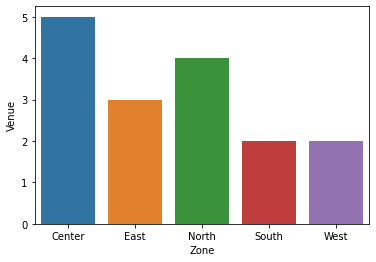

In [19]:
#Zonewise bar plot
import seaborn as sns
sns.barplot(x =Zone_Bakery_plot.index, y = Zone_Bakery_plot['Venue'], data = Zone_Bakery_plot)


In [20]:
PZ_Venues = pd.merge(Pune_venues, Zone_venues, how='inner', on=['Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])
print(PZ_Venues.shape)
PZ_Venues.head()

(217, 10)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Zone,Zone Latitude,Zone Longitude
0,AFMC,18.506342,73.890503,Royal Western Indian Turf Club,18.507033,73.890641,Racetrack,Center,18.513021,73.878765
1,AFMC,18.506342,73.890503,Royal Western Indian Turf Club,18.507033,73.890641,Racetrack,South,18.480641,73.862557
2,Bajirao Road,18.513567,73.853342,Sujata Mastani,18.511793,73.852145,Ice Cream Shop,Center,18.513021,73.878765
3,Bajirao Road,18.513567,73.853342,Sujata Mastani,18.511793,73.852145,Ice Cream Shop,South,18.480641,73.862557
4,Bajirao Road,18.513567,73.853342,Sujata Mastani,18.511793,73.852145,Ice Cream Shop,West,18.498793,73.821123


In [21]:
PZ_Venues.groupby('Neighborhood').count().head()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Zone,Zone Latitude,Zone Longitude
Neighborhood,,,,,,,,,
AFMC,2,2,2,2,2,2,2,2,2
Bajirao Road,9,9,9,9,9,9,9,9,9
Bibvewadi,5,5,5,5,5,5,5,5,5
Boat Club Road,7,7,7,7,7,7,7,7,7
Deccan Gymkhana,21,21,21,21,21,21,21,21,21


In [22]:
print('There are {} uniques categories.'.format(len(PZ_Venues['Venue Category'].unique())))


There are 43 uniques categories.


In [23]:
# one hot encoding
PZ_onehot = pd.get_dummies(PZ_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
PZ_onehot['Neighborhood'] = PZ_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [PZ_onehot.columns[-1]] + list(PZ_onehot.columns[:-1])
PZ_onehot = PZ_onehot[fixed_columns]
print(PZ_onehot.shape)
PZ_onehot.head()

(217, 44)


,Neighborhood,Asian Restaurant,BBQ Joint,Bakery,Bar,Bistro,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Dessert Shop,Fast Food Restaurant,Food,Food Truck,General Entertainment,Gym,Gym / Fitness Center,Historic Site,History Museum,Hotel,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Kebab Restaurant,Lounge,Multiplex,Nightclub,Organic Grocery,Park,Plaza,Racetrack,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Snack Place,Southern / Soul Food Restaurant,Sports Bar,Stadium,Theme Park,Trail,Vegetarian / Vegan Restaurant
0,AFMC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,AFMC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Bajirao Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bajirao Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bajirao Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Now let's check how many venues were returned for each neighborhood


In [24]:
PZ_grouped = PZ_onehot.groupby('Neighborhood').mean()
PZ_grouped.head()


,Asian Restaurant,BBQ Joint,Bakery,Bar,Bistro,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Dessert Shop,Fast Food Restaurant,Food,Food Truck,General Entertainment,Gym,Gym / Fitness Center,Historic Site,History Museum,Hotel,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Kebab Restaurant,Lounge,Multiplex,Nightclub,Organic Grocery,Park,Plaza,Racetrack,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Snack Place,Southern / Soul Food Restaurant,Sports Bar,Stadium,Theme Park,Trail,Vegetarian / Vegan Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFMC,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Bajirao Road,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Bibvewadi,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.600000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Boat Club Road,0.0,0.000000,0.285714,0.142857,0.0,0.0,0.0,0.000000,0.428571,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.142857,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Deccan Gymkhana,0.0,0.142857,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.000000,0.047619,0.095238,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714


In [25]:
#PZ_grouped = PZ_grouped.drop('Pune')
PZ_grouped_fine = PZ_grouped.drop(['General Entertainment', 'Gym', 'Gym / Fitness Center', 'Historic Site', 'History Museum', 'Hotel','Lounge','Nightclub','Organic Grocery','Park','Plaza','Racetrack','Stadium','Theme Park','Trail','Bar','Sports Bar'], axis = 1)
PZ_grouped_fine.head()

,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Dessert Shop,Fast Food Restaurant,Food,Food Truck,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Kebab Restaurant,Multiplex,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Snack Place,Southern / Soul Food Restaurant,Vegetarian / Vegan Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,
AFMC,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Bajirao Road,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Bibvewadi,0.0,0.000000,0.000000,0.0,0.0,0.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.600000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.000000
Boat Club Road,0.0,0.000000,0.285714,0.0,0.0,0.0,0.000000,0.428571,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Deccan Gymkhana,0.0,0.142857,0.000000,0.0,0.0,0.0,0.142857,0.000000,0.047619,0.095238,0.142857,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.285714


<AxesSubplot:ylabel='Neighborhood'>

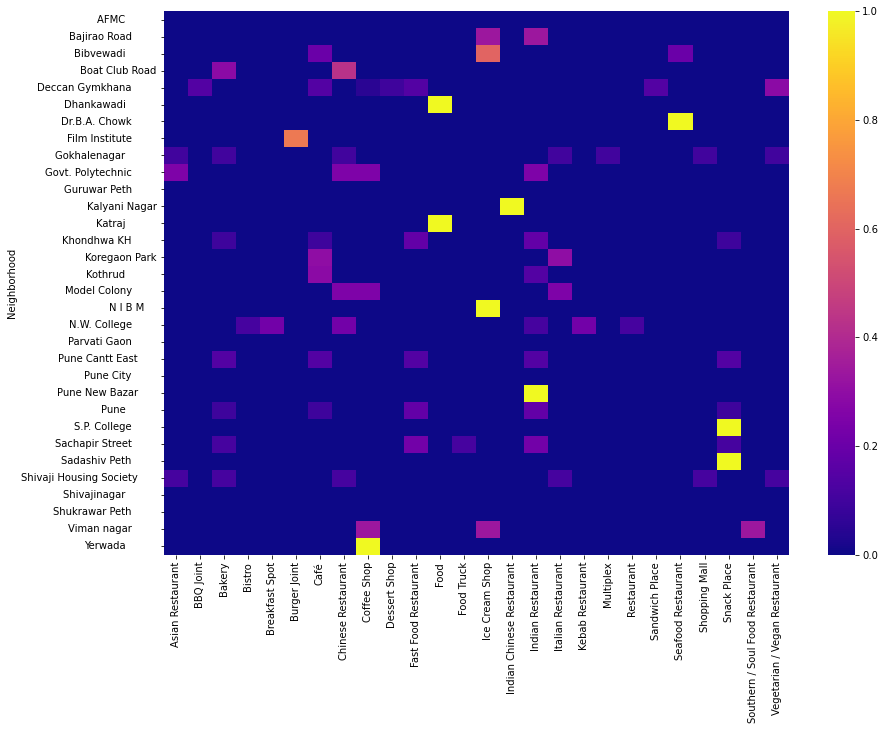

In [26]:
import matplotlib.pyplot as plt
PZ_fine = PZ_grouped_fine.drop([PZ_grouped_fine.index[24]])
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(PZ_fine, cmap='plasma', ax=ax)

In [27]:
Pune_venues.groupby('Neighborhood').count().head()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AFMC,2,2,2,2,2,2
Airport,8,8,8,8,8,8
Akurdi,3,3,3,3,3,3
Ambegaon BK,1,1,1,1,1,1
Ammunition Factory Khadki,1,1,1,1,1,1


#### Finding out how many unique categories can be curated from all the returned venues


In [31]:
print('There are {} uniques categories.'.format(len(Pune_venues['Venue Category'].unique())))


There are 141 uniques categories.


#### Using one hot encoding for Venues


In [32]:
# one hot encoding
Pune_onehot = pd.get_dummies(Pune_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Pune_onehot['Neighborhood'] = Pune_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Pune_onehot.columns[-1]] + list(Pune_onehot.columns[:-1])
Pune_onehot = Pune_onehot[fixed_columns]

Pune_onehot.head()


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport Food Court,Airport Service,Airport Terminal,Airport Ticket Counter,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Bed & Breakfast,Bistro,Bookstore,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Camera Store,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Creperie,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Lake,Liquor Store,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Mughlai Restaurant,Multiplex,Nightclub,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Parsi Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pub,Punjabi Restaurant,Racetrack,Resort,Rest Area,Restaurant,Road,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Watch Shop,Women's Store,Zoo
0,AFMC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AFMC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Airport,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Airport,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Airport,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
Pune_onehot.shape


(869, 142)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [34]:
Pune_grouped = Pune_onehot.groupby('Neighborhood').mean().reset_index()
Pune_grouped.head()


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport Food Court,Airport Service,Airport Terminal,Airport Ticket Counter,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Bed & Breakfast,Bistro,Bookstore,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Camera Store,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Creperie,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Lake,Liquor Store,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Mughlai Restaurant,Multiplex,Nightclub,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Parsi Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pub,Punjabi Restaurant,Racetrack,Resort,Rest Area,Restaurant,Road,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Watch Shop,Women's Store,Zoo
0,AFMC,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,Airport,0.0,0.0,0.0,0.125,0.125,0.125,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Akurdi,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ambegaon BK,1.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [35]:
Pune_grouped.shape


(120, 142)

#### Let's print each neighborhood along with the top 5 most common venues


In [36]:
num_top_venues = 5

for hood in Pune_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Pune_grouped[Pune_grouped['Neighborhood'] == hood].T.reset_index()
    
    #print(temp)
    temp.columns = ['venue','freq']
    #print(temp)
    temp = temp.iloc[1:]
    
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AFMC          ----
               venue  freq
0          Racetrack   0.5
1      Track Stadium   0.5
2                ATM   0.0
3       Optical Shop   0.0
4  Mobile Phone Shop   0.0


----Airport          ----
                    venue  freq
0      Airport Food Court  0.12
1         Airport Service  0.12
2        Airport Terminal  0.12
3  Airport Ticket Counter  0.12
4             Pizza Place  0.12


----Akurdi          ----
                  venue  freq
0            Playground  0.33
1  Fast Food Restaurant  0.33
2       Thai Restaurant  0.33
3    Miscellaneous Shop  0.00
4     Mobile Phone Shop  0.00


----Ambegaon BK        ----
               venue  freq
0                ATM   1.0
1       Optical Shop   0.0
2  Mobile Phone Shop   0.0
3              Motel   0.0
4    Motorcycle Shop   0.0


----Ammunition Factory Khadki      ----
               venue  freq
0                ATM   1.0
1       Optical Shop   0.0
2  Mobile Phone Shop   0.0
3              Motel   0.0
4    Motorcycle Sho

4               Diner   0.2


----Parvati Gaon        ----
                venue  freq
0         Bus Station  0.33
1   Indian Restaurant  0.33
2               Trail  0.33
3           Nightclub  0.00
4  Miscellaneous Shop  0.00


----Parvati          ----
                           venue  freq
0  Vegetarian / Vegan Restaurant   0.5
1                           Café   0.5
2                            ATM   0.0
3                      Nightclub   0.0
4              Mobile Phone Shop   0.0


----Pimple Gurav        ----
               venue  freq
0  Indian Restaurant   1.0
1                ATM   0.0
2       Optical Shop   0.0
3  Mobile Phone Shop   0.0
4              Motel   0.0


----Pimpri Colony        ----
                             venue  freq
0                   Ice Cream Shop   0.2
1                Indian Restaurant   0.2
2                     Dessert Shop   0.2
3                           Bistro   0.2
4  Southern / Soul Food Restaurant   0.2


----Pimpri P F      ----
             

#### Let's put that into a pandas dataframe


In [37]:
#Function sorted values
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Pune_grouped['Neighborhood']

for ind in np.arange(Pune_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Pune_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,AFMC,Racetrack,Track Stadium,ATM,Optical Shop,Mobile Phone Shop
1,Airport,Airport Food Court,Airport Service,Airport Terminal,Airport Ticket Counter,Pizza Place
2,Akurdi,Playground,Fast Food Restaurant,Thai Restaurant,Miscellaneous Shop,Mobile Phone Shop
3,Ambegaon BK,ATM,Optical Shop,Mobile Phone Shop,Motel,Motorcycle Shop
4,Ammunition Factory Khadki,ATM,Optical Shop,Mobile Phone Shop,Motel,Motorcycle Shop


#### Clustering Neighborhoods using K-means


In [39]:
# set number of clusters
kclusters = 5

Pune_grouped_clustering = Pune_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Pune_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

C:\Users\dell\AppData\Local\Temp/ipykernel_11284/65446022.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Pune_grouped_clustering = Pune_grouped.drop('Neighborhood', 1)


array([2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2])

#### Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [40]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Pune_merged = Pune_filtered

# merge Pune_grouped with Pune_data to add latitude/longitude for each neighborhood
Pune_merged = Pune_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Pune_merged.head() # check the last columns!
New_Pune = Pune_merged.dropna(axis = 0, how ='any')
convert_dict = {'Cluster Labels': int, 
               } 
  
New_Pune = New_Pune.astype(convert_dict) 
New_Pune.head()

,Neighborhood,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,AFMC,411040,18.506342,73.890503,2,Racetrack,Track Stadium,ATM,Optical Shop,Mobile Phone Shop
3,Airport,411032,18.578542,73.908641,2,Airport Food Court,Airport Service,Airport Terminal,Airport Ticket Counter,Pizza Place
4,Akurdi,411035,18.646468,73.774262,2,Playground,Fast Food Restaurant,Thai Restaurant,Miscellaneous Shop,Mobile Phone Shop
16,Ambegaon BK,411046,18.402869,73.853668,3,ATM,Optical Shop,Mobile Phone Shop,Motel,Motorcycle Shop
24,Ammunition Factory Khadki,411003,18.567988,73.857668,3,ATM,Optical Shop,Mobile Phone Shop,Motel,Motorcycle Shop


#### Finally, let's visualize the resulting clusters


In [1]:
# create map
latitude = 18.516726
longitude = 73.856255
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Pune['Latitude'], New_Pune['Longitude'], New_Pune['Neighborhood'], New_Pune['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

    
for lat1, lon1, poi1, ven1 in zip(Bakery['Venue Latitude'], Bakery['Venue Longitude'], Bakery['Neighborhood'], Bakery['Venue']):
    label1 = folium.Popup(str(ven1) + str(poi1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label1,
        color='b',
        fill=True,
        fill_color='r',
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

NameError: name 'folium' is not defined

#### Examining Each Cluster
#### Cluster 0

In [42]:
New_Pune.loc[New_Pune['Cluster Labels'] == 0, New_Pune.columns[[1] + list(range(5, New_Pune.shape[1]))]]


,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
289,411011,Coffee Shop,ATM,Optical Shop,Mobile Phone Shop,Motel
420,411011,Coffee Shop,ATM,Optical Shop,Mobile Phone Shop,Motel
783,411006,Coffee Shop,ATM,Optical Shop,Mobile Phone Shop,Motel


#### Cluster 1




In [43]:
New_Pune.loc[New_Pune['Cluster Labels'] == 1, New_Pune.columns[[1] + list(range(5, New_Pune.shape[1]))]]


,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
42,411027,Indian Restaurant,Garden,Vegetarian / Vegan Restaurant,Café,Nightclub
49,411045,Breakfast Spot,Juice Bar,Lounge,Indian Restaurant,South Indian Restaurant
56,411021,Indian Restaurant,ATM,Optical Shop,Mobile Phone Shop,Motel
72,411042,Indian Restaurant,Furniture / Home Store,Diner,Snack Place,Platform
156,411015,Indian Restaurant,Café,Coffee Shop,Optical Shop,Motel
161,411025,Indian Restaurant,Punjabi Restaurant,Resort,ATM,Optical Shop
191,411028,Indian Restaurant,Pizza Place,ATM,Optical Shop,Mobile Phone Shop
288,411034,Indian Restaurant,Hotel,Bar,Bakery,Pizza Place
330,411048,Indian Restaurant,Fast Food Restaurant,Lounge,Breakfast Spot,Ice Cream Shop
387,411030,Indian Restaurant,Playground,Bakery,Snack Place,Mobile Phone Shop


#### Cluster 2



In [44]:
New_Pune.loc[New_Pune['Cluster Labels'] == 2, New_Pune.columns[[1] + list(range(5, New_Pune.shape[1]))]]


,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,411040,Racetrack,Track Stadium,ATM,Optical Shop,Mobile Phone Shop
3,411032,Airport Food Court,Airport Service,Airport Terminal,Airport Ticket Counter,Pizza Place
4,411035,Playground,Fast Food Restaurant,Thai Restaurant,Miscellaneous Shop,Mobile Phone Shop
26,411051,Vegetarian / Vegan Restaurant,ATM,Nightclub,Miscellaneous Shop,Mobile Phone Shop
35,411021,Farmers Market,Flea Market,ATM,Motel,Motorcycle Shop
43,411007,Coffee Shop,Park,Bar,ATM,Optical Shop
41,411007,Dessert Shop,Café,Indian Restaurant,Ice Cream Shop,Punjabi Restaurant
47,411002,Indian Restaurant,Ice Cream Shop,Indian Sweet Shop,History Museum,Road
50,411008,Park,ATM,Optical Shop,Mobile Phone Shop,Motel
85,411026,Hotel,ATM,Nightclub,Miscellaneous Shop,Mobile Phone Shop


#### Cluster 3

In [45]:
New_Pune.loc[New_Pune['Cluster Labels'] == 3, New_Pune.columns[[1] + list(range(5, New_Pune.shape[1]))]]


,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,411046,ATM,Optical Shop,Mobile Phone Shop,Motel,Motorcycle Shop
24,411003,ATM,Optical Shop,Mobile Phone Shop,Motel,Motorcycle Shop
84,411039,ATM,Optical Shop,Mobile Phone Shop,Motel,Motorcycle Shop
165,411003,ATM,Business Service,Plaza,Mobile Phone Shop,Motel
207,411003,ATM,Park,Optical Shop,Mobile Phone Shop,Motel
386,411047,ATM,Mattress Store,Middle Eastern Restaurant,Mobile Phone Shop,Motel
447,411036,ATM,Optical Shop,Mobile Phone Shop,Motel,Motorcycle Shop
683,411062,ATM,Mobile Phone Shop,Optical Shop,Motel,Motorcycle Shop
694,411033,ATM,Fast Food Restaurant,Nightclub,Mobile Phone Shop,Motel


#### Cluster 4

In [47]:
New_Pune.loc[New_Pune['Cluster Labels'] == 4, New_Pune.columns[[1] + list(range(5, New_Pune.shape[1]))]]


,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
306,411024,Café,ATM,Plaza,Mobile Phone Shop,Motel
471,411023,Café,ATM,Plaza,Mobile Phone Shop,Motel
522,411009,Vegetarian / Vegan Restaurant,Café,ATM,Nightclub,Mobile Phone Shop
